In [111]:
#importer vos lib
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from datetime import datetime
import random

In [112]:
#imporot du dataset mushroom
data = pd.read_csv('./DATA/mushrooms.csv')

Définition des valeurs :

•classes: edible=e, poisonous=p

•cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s

•cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s

•cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y

•bruises: bruises=t,no=f

•odor: almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s

•gill-attachment: attached=a,descending=d,free=f,notched=n

•gill-spacing: close=c,crowded=w,distant=d

•gill-size: broad=b,narrow=n

•gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y

•stalk-shape: enlarging=e,tapering=t

•stalk-root: bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=?

•stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s

•stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s

•stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

•stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

•veil-type: partial=p,universal=u

•veil-color: brown=n,orange=o,white=w,yellow=y

•ring-number: none=n,one=o,two=t

•ring-type: cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z

•spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y

•population: abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y

•habitat: grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d

In [113]:
# creation de date fictive pour l'authentification et remplacement valeur class
def generateDate():
    year = random.randint(1970, 2010) 
    month = random.randint(1, 12)
    day = random.randint(1, 28)
    return datetime(year,month,day)



dateTable = []
for i in data["class"]:
    dateTable.append(generateDate())
data.insert(1, "identify_at", dateTable)
data



,class,identify_at,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,2001-08-27,x,s,n,t,p,f,c,n,...,s,w,w,p,w,o,p,k,s,u
1,e,1977-06-09,x,s,y,t,a,f,c,b,...,s,w,w,p,w,o,p,n,n,g
2,e,1989-07-18,b,s,w,t,l,f,c,b,...,s,w,w,p,w,o,p,n,n,m
3,p,1987-08-19,x,y,w,t,p,f,c,n,...,s,w,w,p,w,o,p,k,s,u
4,e,1977-12-14,x,s,g,f,n,f,w,b,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,2005-07-18,k,s,n,f,n,a,c,b,...,s,o,o,p,o,o,p,b,c,l
8120,e,1976-07-22,x,s,n,f,n,a,c,b,...,s,o,o,p,n,o,p,b,v,l
8121,e,1995-02-24,f,s,n,f,n,a,c,b,...,s,o,o,p,o,o,p,b,c,l
8122,p,2000-02-05,k,y,n,f,y,f,c,n,...,k,w,w,p,w,o,e,w,v,l


In [114]:

data.shape

(8124, 24)

In [115]:
data.head()

,class,identify_at,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,2001-08-27,x,s,n,t,p,f,c,n,...,s,w,w,p,w,o,p,k,s,u
1,e,1977-06-09,x,s,y,t,a,f,c,b,...,s,w,w,p,w,o,p,n,n,g
2,e,1989-07-18,b,s,w,t,l,f,c,b,...,s,w,w,p,w,o,p,n,n,m
3,p,1987-08-19,x,y,w,t,p,f,c,n,...,s,w,w,p,w,o,p,k,s,u
4,e,1977-12-14,x,s,g,f,n,f,w,b,...,s,w,w,p,w,o,e,n,a,g


In [116]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   class                     8124 non-null   object        
 1   identify_at               8124 non-null   datetime64[ns]
 2   cap-shape                 8124 non-null   object        
 3   cap-surface               8124 non-null   object        
 4   cap-color                 8124 non-null   object        
 5   bruises                   8124 non-null   object        
 6   odor                      8124 non-null   object        
 7   gill-attachment           8124 non-null   object        
 8   gill-spacing              8124 non-null   object        
 9   gill-size                 8124 non-null   object        
 10  gill-color                8124 non-null   object        
 11  stalk-shape               8124 non-null   object        
 12  stalk-root          

Répartission des champignons comestible ou toxique

<AxesSubplot:xlabel='class', ylabel='count'>

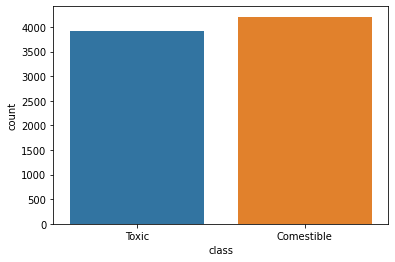

In [117]:

new_data = data.replace({"class":{"p":"Toxic","e":"Comestible"}})

sns.countplot(x = 'class',data = new_data)

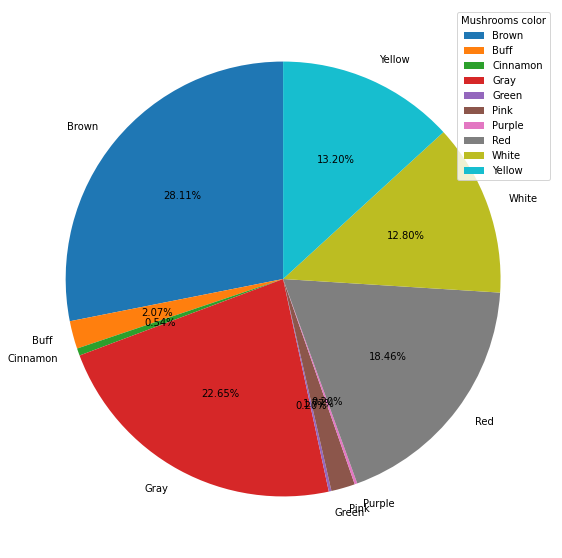

In [118]:
# Calcul des champignons commestibles ou toxiques
brunMushrooms = (data["cap-color"]== "n").sum()
buffMushrooms = (data["cap-color"]== "b").sum()
cinnamonMushrooms = (data["cap-color"]== "c").sum()
grayMushrooms = (data["cap-color"]== "g").sum()
greenMushrooms = (data["cap-color"]== "r").sum()
pinkMushrooms = (data["cap-color"]== "p").sum()
purpleMushrooms = (data["cap-color"]== "u").sum()
redMushrooms = (data["cap-color"]== "e").sum()
whiteMushrooms = (data["cap-color"]== "w").sum()
yellowMushrooms = (data["cap-color"]== "y").sum()
labels = ["Brown","Buff","Cinnamon","Gray","Green","Pink","Purple","Red","White","Yellow"]

plt.figure(figsize = (10,10))
plt.pie([brunMushrooms,
buffMushrooms,
cinnamonMushrooms, 
grayMushrooms,
greenMushrooms, 
pinkMushrooms, 
purpleMushrooms, 
redMushrooms, 
whiteMushrooms,
yellowMushrooms], labels =labels, startangle = 90,autopct = "%0.2f%%")

plt.legend(title = "Mushrooms color")
plt.show()

•cap-color: 
    brown=n,
    buff=b,
    cinnamon=c,
    gray=g,
    green=r,
    pink=p,
    purple=u,
    red=e,
    white=w,
    yellow=y

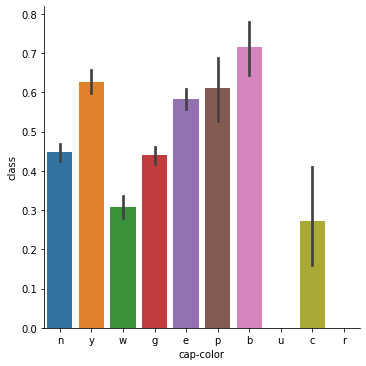

In [119]:
# rapprochement entre la couleur et la toxicité 
new_data = data.replace({"class":{"p":1,"e":0}})
sns.catplot(data=new_data, y='class', x="cap-color",kind="bar")

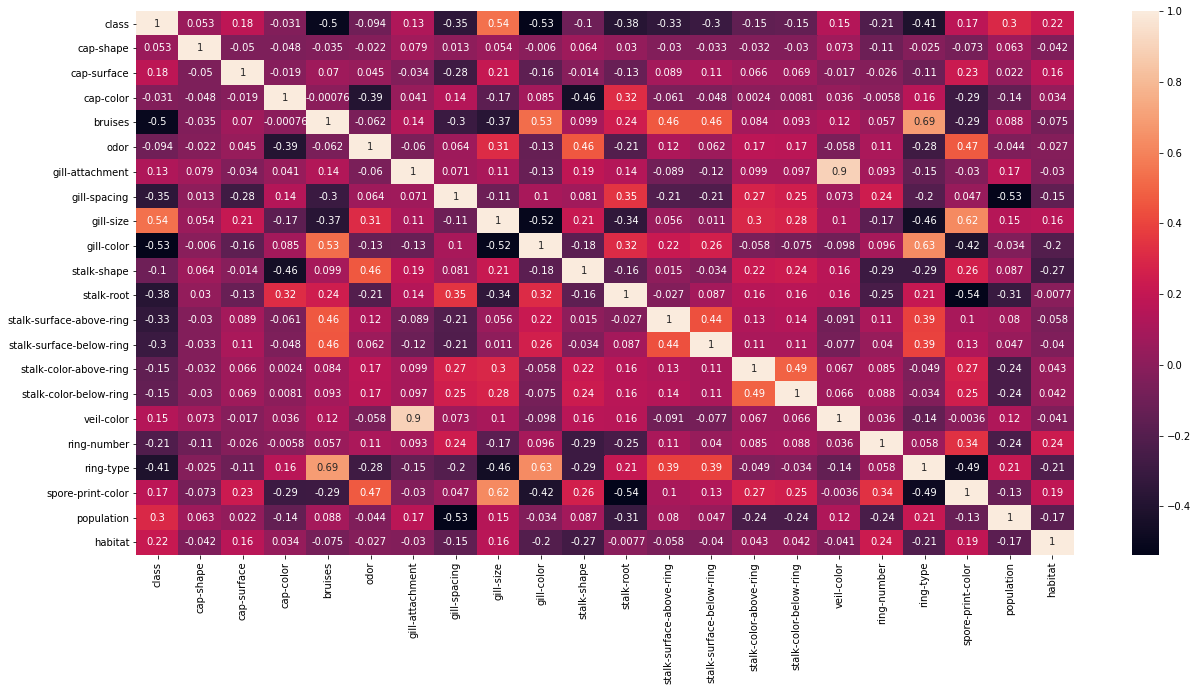

In [120]:
# remplacement des valeur object en numéric + heatMap
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
for col in data.columns:
    if(col != "identify_at" and col != "veil-type"):
        data[col] = label.fit_transform(data[col])

plt.figure(figsize=(21, 10))
sns.heatmap(data.corr(), annot=True)
plt.show()

In [121]:
X = data.drop(["identify_at","class","veil-type"],axis=1)
Y = data['class']
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y)


In [122]:
X_train.shape

(6093, 21)

In [123]:
X_test.shape

(2031, 21)

In [124]:
# algo classification
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter = 10000)
lr.fit(X_train,Y_train)

#getting confusion matrix
from sklearn.metrics import confusion_matrix
Y_pred = lr.predict(X_test)
print('confusion matrix:\n',confusion_matrix(Y_test,Y_pred))



confusion matrix:
 [[981  43]
 [ 66 941]]


0 = Comestible
1= toxique

In [125]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,Y_pred))



              precision    recall  f1-score   support

           0       0.94      0.96      0.95      1024
           1       0.96      0.93      0.95      1007

    accuracy                           0.95      2031
   macro avg       0.95      0.95      0.95      2031
weighted avg       0.95      0.95      0.95      2031



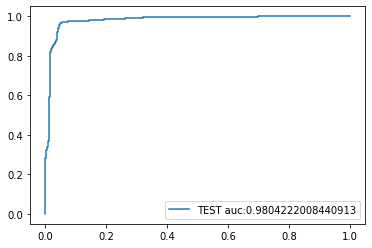

In [126]:

from sklearn.metrics import roc_auc_score
from sklearn import metrics


Y_pred_proba = lr.predict_proba(X_test)[::,1]
auc = metrics.roc_auc_score(Y_test, Y_pred_proba)
fpr, tpr, _ = metrics.roc_curve(Y_test,  Y_pred_proba)
plt.plot(fpr,tpr,label="TEST auc:"+str(auc))
plt.legend(loc=4)
plt.show()

In [127]:
from sklearn.neighbors import KNeighborsClassifier
from time import perf_counter

evolution = []
tps1 = perf_counter()

for i in range(1,21):
    knn = KNeighborsClassifier(n_neighbors=i)
# fit 
    knn.fit(X_train, Y_train)
    accuracy_score(Y_test, knn.predict(X_test))
    evolution.append([accuracy_score(Y_test, knn.predict(X_test))])
tps2 = perf_counter()

print(tps2 - tps1)
evolution



16.04792129999987


[[1.0],
 [1.0],
 [1.0],
 [1.0],
 [0.999015263417036],
 [0.9985228951255539],
 [0.9980305268340719],
 [0.9985228951255539],
 [0.9975381585425899],
 [0.9970457902511078],
 [0.9970457902511078],
 [0.9960610536681438],
 [0.9955686853766618],
 [0.9955686853766618],
 [0.9955686853766618],
 [0.9950763170851797],
 [0.9950763170851797],
 [0.9935992122107337],
 [0.9935992122107337],
 [0.9921221073362876]]

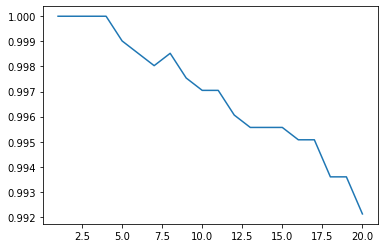

In [128]:
y = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
plt.plot(y, evolution)

In [129]:
X_train

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
5929,0,2,8,1,5,1,0,0,10,0,...,2,2,7,7,2,2,4,5,4,1
3327,5,0,5,0,1,1,1,1,2,0,...,2,2,7,7,2,1,4,3,4,0
1741,2,0,4,0,5,1,1,0,3,1,...,2,2,7,7,2,1,0,3,3,1
2743,2,3,4,1,5,1,0,0,7,1,...,2,2,6,3,2,1,4,2,4,0
4003,2,0,2,1,5,1,0,0,10,1,...,2,2,3,6,2,1,4,2,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2163,5,3,4,1,5,1,0,0,9,1,...,2,2,7,6,2,1,4,2,5,0
4524,2,3,3,0,2,1,0,0,3,0,...,1,1,4,0,2,1,2,1,4,4
5273,3,0,4,0,5,1,1,1,10,0,...,2,2,7,4,2,1,0,7,4,2
5809,2,3,9,0,2,1,0,0,7,0,...,1,1,0,4,2,1,2,1,4,0


In [130]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(Y_test,Y_pred)
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      1024
           1       0.96      0.93      0.95      1007

    accuracy                           0.95      2031
   macro avg       0.95      0.95      0.95      2031
weighted avg       0.95      0.95      0.95      2031



In [131]:
print('Accuracy {:.2f}'.format(accuracy))

Accuracy 0.95


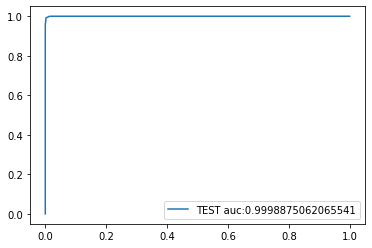

In [132]:
Y_pred_proba = knn.predict_proba(X_test)[::,1]
auc = metrics.roc_auc_score(Y_test, Y_pred_proba)
fpr, tpr, _ = metrics.roc_curve(Y_test,  Y_pred_proba)
plt.plot(fpr,tpr,label="TEST auc:"+str(auc))
plt.legend(loc=4)
plt.show()

In [133]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

cls_forest = RandomForestClassifier(n_estimators=200)
cls_forest.fit(X_train, Y_train)

score_rf = cross_val_score(cls_forest,X_train , Y_train, cv=10, scoring='accuracy')
print('Accuracy {:.2f}'.format(score_rf.mean()))

Accuracy 1.00


In [134]:
feature_importances = pd.DataFrame(cls_forest.feature_importances_,index = X_train.columns,columns=['importance']).sort_values('importance',ascending=False)

In [135]:
feature_importances

,importance
odor,0.157454
gill-size,0.123864
gill-color,0.115791
spore-print-color,0.109249
stalk-surface-above-ring,0.061809
ring-type,0.060183
population,0.059092
stalk-root,0.051942
gill-spacing,0.044712
bruises,0.039203


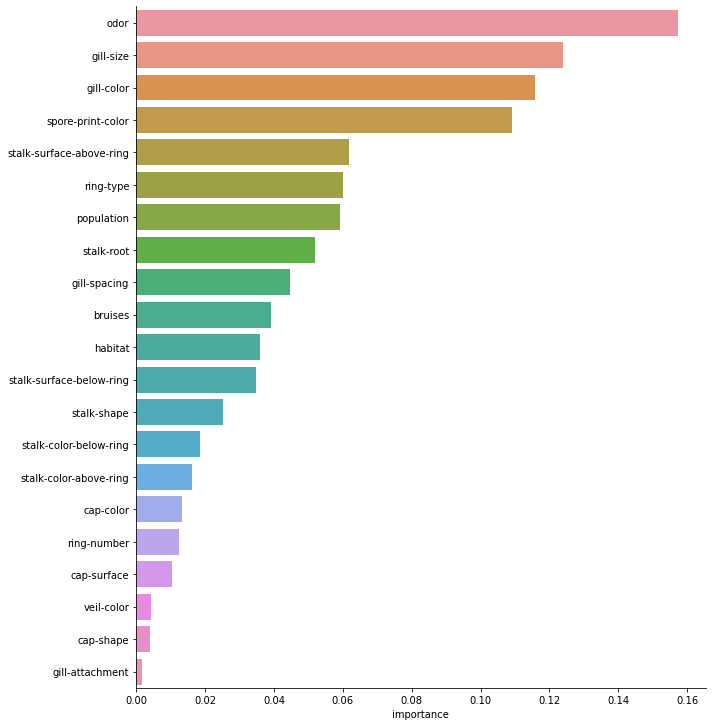

In [136]:
# imput important
sns.catplot(x=feature_importances['importance'], y=feature_importances['importance'].index,kind="bar", data=feature_importances, height=10)

l'odeur est un input principal poue permetre de reconnaitre la toxiciter du champ